# Νευρωνικά Δίκτυα και Ευφυή Συστήματα - Άσκηση 1 (Small Dataset)
Ομάδα M.A.2

Δαβαράκης Θεοδωρής       ΑΜ : 03115002

Θεοδοσίου Ιωάννης        ΑΜ : 03115056

Βόσινας Κωνσταντίνος     ΑΜ : 03116435




### Μέρος 1 - Παρουσίαση του Dataset

Στην πρώτη εργαστηριακή άσκηση θα αναλύσουμε την απόδοση διάφορων classifier σε δύο dataset, ένα μικρό και ένα μεγάλο. Σε αυτό το notebook θα ασχοληθούμε με το μικρό dataset S07 - ionosphere.

Το dataset αποτελείται από μετρήσεις radar στην ιονόσφαιρα, οι οποίες χαρακτηρίζονται είτε 'Good' είτε 'Bad'.

Αρχικά, εγκαθιστούμε τις βιβλιοθήκες που θα χρειαστούμε στη συνέχεια.

In [ ]:
!pip install --upgrade pip #upgrade pip package installer
!pip install scikit-learn --upgrade #upgrade scikit-learn package
!pip install numpy --upgrade #upgrade numpy package
!pip install pandas --upgrade #--upgrade #upgrade pandas package
!pip install scipy --upgrade

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)
Requirement already up-to-date: scipy in /usr/local/lib/python3.6/dist-packages (1.4.0)


In [ ]:
import pandas as pd
import numpy as np
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from seaborn import heatmap

Το dataset αποτελείται από 351 δείγματα, κάθε δείγμα έχει 34 χαρακτηριστικά, τα οποία είναι τύπου float ή integer, στο διάστημα [-1,1]. Το dataset δεν έχει επικεφαλίδες, αλλά έχει αρίθμηση γραμμών και στηλών, ενώ δεν υπάρχουν απουσιάζουσες τιμές.

Τα δεδομένα του dataset ανήκουν σε 2 κλάσεις, με τα labels g και b. Βρίσκονται στην τελευταία στήλη του dataset. Δε χρειάστηκαν μετατροπές στο αρχείο txt, αλλά χρειάστηκε να βγάλουμε τις στηλες αρίθμησης από το dataframe.

In [ ]:
# import data
df=pd.read_csv('ionosphere.data',header=None)
print(df)
labels_df = df.iloc[:,[-1]]
features_df = df.iloc[:, 0:-1]
np_features = features_df.values
print('Contains NaN elements : ',np.isnan(np_features).any())

     0   1        2        3        4   ...       30       31       32       33  34
0     1   0  0.99539 -0.05889  0.85243  ...  0.42267 -0.54487  0.18641 -0.45300   g
1     1   0  1.00000 -0.18829  0.93035  ... -0.16626 -0.06288 -0.13738 -0.02447   b
2     1   0  1.00000 -0.03365  1.00000  ...  0.60436 -0.24180  0.56045 -0.38238   g
3     1   0  1.00000 -0.45161  1.00000  ...  0.25682  1.00000 -0.32382  1.00000   b
4     1   0  1.00000 -0.02401  0.94140  ... -0.05707 -0.59573 -0.04608 -0.65697   g
..   ..  ..      ...      ...      ...  ...      ...      ...      ...      ...  ..
346   1   0  0.83508  0.08298  0.73739  ...  0.86660 -0.10714  0.90546 -0.04307   g
347   1   0  0.95113  0.00419  0.95183  ...  0.94066 -0.00035  0.91483  0.04712   g
348   1   0  0.94701 -0.00034  0.93207  ...  0.92459  0.00442  0.92697 -0.00577   g
349   1   0  0.90608 -0.01657  0.98122  ...  0.96022 -0.03757  0.87403 -0.16243   g
350   1   0  0.84710  0.13533  0.73638  ...  0.75747 -0.06678  0.85764 -0.06

In [ ]:
mapping = {'g': 1, 'b': 0}
labels_df = labels_df.replace(mapping)
np_labels = labels_df.values.flatten()

Στο σύνολο παρατηρούμε ύπαρξη 64.10% εμφανίσεων της κλάσης 'g' και 35.90% της κλάσης 'b', οπότε δεν είναι ισορροπημένο.

In [ ]:
g_count = np.count_nonzero(np_labels)
b_count = len(np_labels) - g_count

print("Occurences of class \'g\' : ", "{0:.2f}".format(100*g_count/(len(np_labels))), "%")
print("Occurences of class \'b\' : ", "{0:.2f}".format(100*b_count/(len(np_labels))), "%")

Occurences of class 'g' :  64.10 %
Occurences of class 'b' :  35.90 %


Διαχωρίζουμε σε train και test set με την επιλογή stratify, ώστε να χωριστούν ισάξια σε train και test sets. Παρατηρούμε ότι διατηρείται η ανισσοροπία στα train και test sets.

In [ ]:
#split in train and test set 

x_train, x_test, y_train, y_test = train_test_split(np_features, np_labels,stratify=np_labels, test_size=0.2)

In [ ]:
g_count = np.count_nonzero(y_train)
b_count = len(y_train) - g_count

print("Occurences of class \'g\' in train set : ", "{0:.2f}".format(100*g_count/(len(y_train))), "%")
print("Occurences of class \'b\' in train set : ", "{0:.2f}".format(100*b_count/(len(y_train))), "%")

g_count = np.count_nonzero(y_test)
b_count = len(y_test) - g_count

print("Occurences of class \'g\' in test set : ", "{0:.2f}".format(100*g_count/(len(y_test))), "%")
print("Occurences of class \'b\' in test set : ", "{0:.2f}".format(100*b_count/(len(y_test))), "%")

Occurences of class 'g' in train set :  63.93 %
Occurences of class 'b' in train set :  36.07 %
Occurences of class 'g' in test set :  64.79 %
Occurences of class 'b' in test set :  35.21 %


Με αυτό ολοκληρώνεται η προεπεξεργασία στο dataset και θα προχωρήσουμε στην αξιολόγηση βασικών ταξινομητών πάνω σε αυτό.

## Μέρος 2 - Baseline Classification

Σε αυτό το τμήμα θα εφαρμόσουμε στο dataset τον dummy clasifier με διάφορες στρατηγικές, καθώς και τον knn clasifier για μερικές τιμές του k. Θα εξάγουμε συμπεράσματα σχετικά με την απόδοσή τους με τη χρήση των μετρικών f1-micro, f1-macro average scores.

Αρχικά, δημιουργούμε μια συνάρτηση που εμφανίζει τον confusion matrix, την οποία θα χρησιμοποιήσουμε στη συνέχεια.



In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix'):
    import itertools

    cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)



    thresh = cm.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, "{:,}".format(cm[i, j]),
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


Δημιουργούμε μια συνάρτηση για να εμφανίζουμε τα ζητούμενα bar plots του κάθε ερωτήματος. Παίρνει ως όρισμα μια λίστα με classifiers, δύο λίστες με μετρικές και τα labels τους και τυπώνει στο ίδιο διάγραμμα τα αντίστοιχα bar plots.

In [ ]:
def bar_plot(x_values, val1, val2, label1, label2, ylabel, title):
  x = np.arange(len(x_values))
  fig, ax = plt.subplots(figsize = (10,8))
  width = 0.4

  rects1 = ax.bar(x-width/2, val1, width, label = label1)
  rects2 = ax.bar(x+width/2, val2, width, label = label2)

  ax.set_ylabel(ylabel)
  ax.set_title(title)
  ax.set_xticks(x)
  ax.set_xticklabels(x_values)
  ax.legend()
  fig.tight_layout()

  plt.show()

Σε πρώτη φάση θα χρησιμοποιήσουμε τον dummy clasifier με τις παρακάτω στρατηγικές:

* $\text{constant=0}$ και $\text{constant=1}$. Προβλέπει συνεχώς 0 ή 1.
* $\text{stratified}$. Δημιουργεί προβλέψεις με βάση την κατανομή των κλάσεων στο αρχικό dataset.
* $\text{most_frequent}$. Προβλέπει την πιο συχνά εμφανιζόμενη κλάση.
* $\text{uniform}$. Προβλέπει τυχαία αποτελέσματα που ακολουθούν κανονική κατανομή.

Για κάθε classification εμφανίζουμε το confusion matrix και τα f1-micro score και f1-macro score. Επιπλέον, εμφανίζουμε σε bar plots τα παραπάνω scores και το classification report του καλύτερου ταξινομητή.
Για κάθε στρατηγική κρατάμε το χρόνο εκτέλεσης για τα στάδια εκμάθησης (fit) και πρόβλεψης (predict) ξεχωριστά.

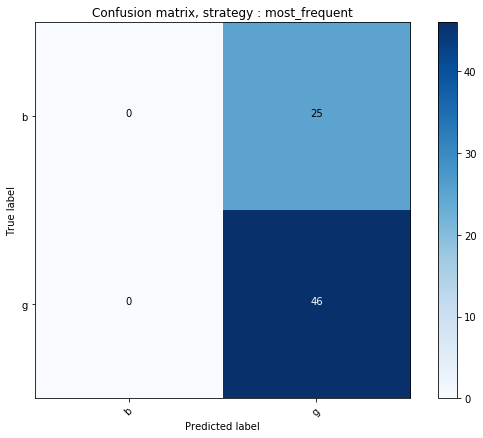

f1-macro average for most_frequent  is  0.39316239316239315
f1-macro average for most_frequent  is  0.647887323943662


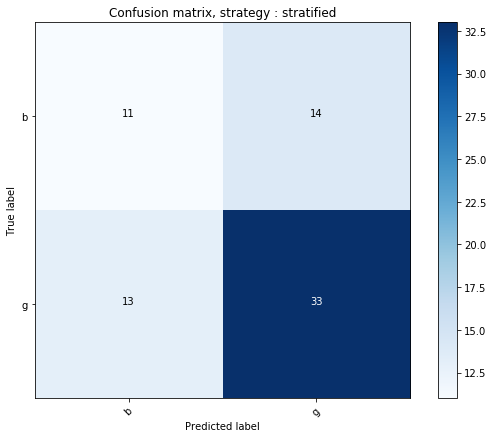

f1-macro average for stratified  is  0.5793285055957867
f1-macro average for stratified  is  0.6197183098591549


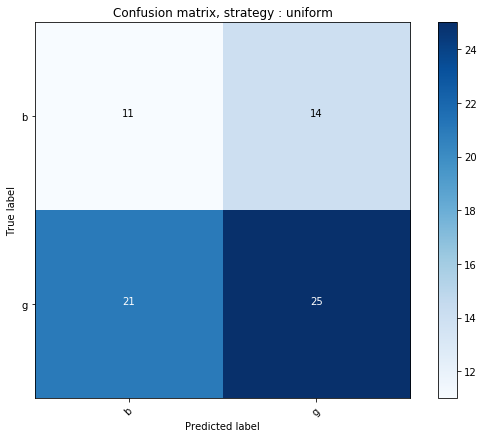

f1-macro average for uniform  is  0.4871001031991744
f1-macro average for uniform  is  0.5070422535211268


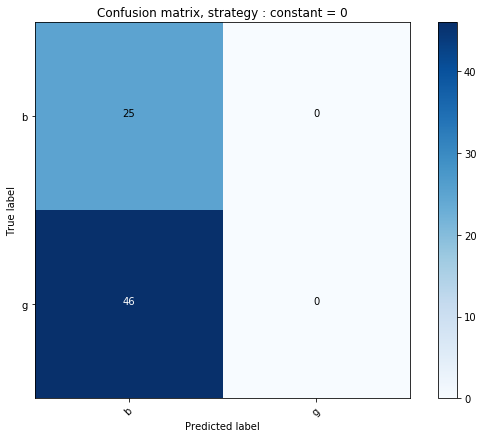

f1-macro average for constant = 0  is  0.26041666666666663
f1-macro average for constant = 0  is  0.352112676056338


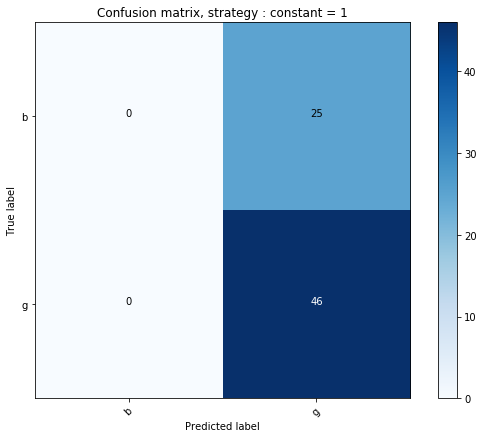

f1-macro average for constant = 1  is  0.39316239316239315
f1-macro average for constant = 1  is  0.647887323943662


In [ ]:
#dummy classifier
from sklearn.dummy import DummyClassifier
from time import time

strategies = ['most_frequent', 'stratified', 'uniform', 'constant = 0', 'constant = 1'] 

dummy_f1_macro=[]
dummy_f1_micro=[]
test_scores = [] 
dummy_time_fit=[]
dummy_time_predict=[]


for s in strategies: 
  if s =='constant = 0':
    dclf = DummyClassifier(strategy = 'constant', constant = 0) 
  elif s =='constant = 1': 
    dclf = DummyClassifier(strategy = 'constant', constant = 1) 
  else: 
    dclf = DummyClassifier(strategy = s)
  
  start = time()
  dclf.fit(x_train, y_train)
  end = time()

  dummy_time_fit.append(end - start)

  start = time()
  y_pred = dclf.predict(x_test)
  end = time()

  dummy_time_predict.append(end - start)
  
  score_micro = f1_score(y_test,y_pred, average = 'micro')
  score_macro = f1_score(y_test,y_pred, average = 'macro')

  plot_confusion_matrix(confusion_matrix(y_test, y_pred),
                          ['b','g'],
                          title='Confusion matrix, strategy : '+ s)
  
  print('f1-macro average for', s,' is ', score_macro)
  print('f1-macro average for', s,' is ', score_micro)

  test_scores.append((score_micro+score_macro)/2)
  dummy_f1_micro.append(score_micro)
  dummy_f1_macro.append(score_macro)

Εμφανίζουμε σε bar plots για κάθε στρατηγική του dummy classifier f1_micro και f2_micro averages.

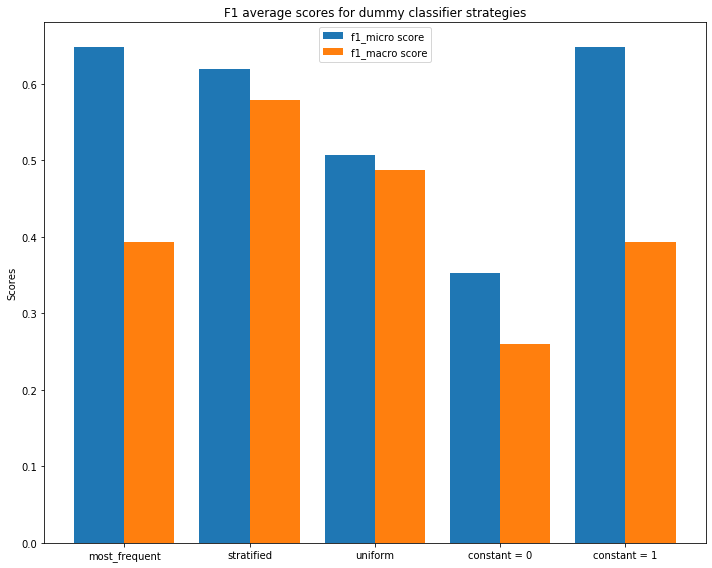

In [ ]:
# bar plots for dummy clasifier
bar_plot(strategies, dummy_f1_micro, dummy_f1_macro, "f1_micro score", "f1_macro score", "Scores", 'F1 average scores for dummy classifier strategies')

Τέλος εμφανίζουμε τα αποτελέσματα της καλύτερης στρατηγικής για τον dummy classifier με βάση τα train δεδομένα.

In [ ]:
#results for best dummy classifier

best_strategy=strategies[np.argmax(test_scores)]
print("the best strategy regarding the training set is: ",best_strategy)
dclf_best=DummyClassifier(strategy = best_strategy)
dclf_best.fit(x_train,y_train)
y_pr=dclf_best.predict(x_test)

print("f1-macro score is: ",f1_score(y_test,y_pr,average = 'macro')," and f1-micro score is: ",f1_score(y_test,y_pr,average = 'micro'))

print(classification_report(y_test, y_pred))

the best strategy regarding the training set is:  stratified
f1-macro score is:  0.5604761904761906  and f1-micro score is:  0.6338028169014085
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.65      1.00      0.79        46

    accuracy                           0.65        71
   macro avg       0.32      0.50      0.39        71
weighted avg       0.42      0.65      0.51        71



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Παρατηρούμε πως δεν είναι κάποια στρατηγική του dummy classifier μονίμως η καλύτερη. Εδώ προέκυψε ως καλύτερη η stratified. Με τη uniform, παρατηρούμε f1-score κοντά στο 0.5, ενώ το dataset δεν είναι ισορροπημένο. Τη χειρότερη απόδοση την πετυχαίνουμε με την constant = 0, το οποίο είναι λογική, αφού έχουμε περίπου τα μισά δείγματα της αντίστοιχης κλάσης.

### Baseline classification για τον knn

Στη συνέχεια, εκτελούμε τις ίδιες μετρήσεις για τον ταξινομητή knn, για τιμές k = [1, 3, 5, 7, 9, 11]. Και πάλι, υπολογίζουμε f1-marco και f1-micro average scores, τα οποία αναπαριστούμε σε bar plots.

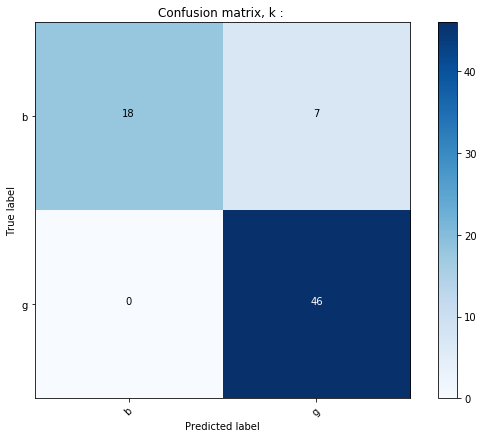

f1-micro average for k = 1  is  0.9014084507042254
f1-macro average for k = 1  is  0.8832511158092553


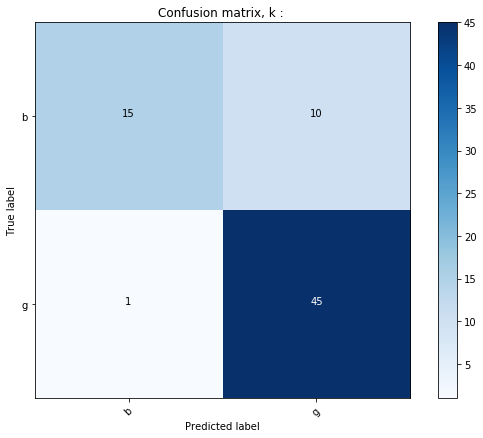

f1-micro average for k = 3  is  0.8450704225352113
f1-macro average for k = 3  is  0.811398212992031


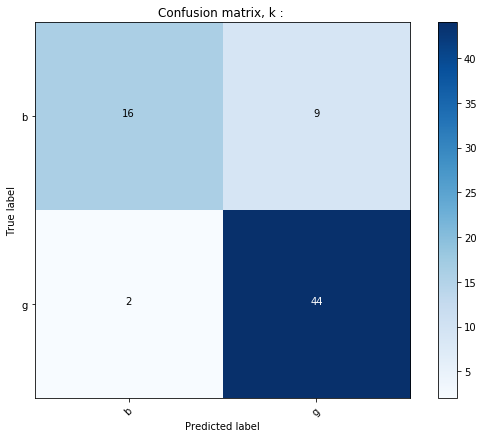

f1-micro average for k = 5  is  0.8450704225352113
f1-macro average for k = 5  is  0.8165374677002584


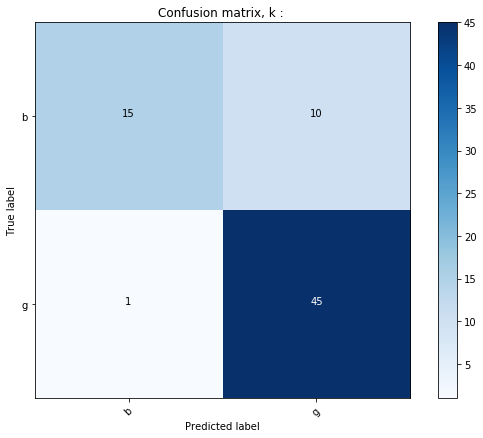

f1-micro average for k = 7  is  0.8450704225352113
f1-macro average for k = 7  is  0.811398212992031


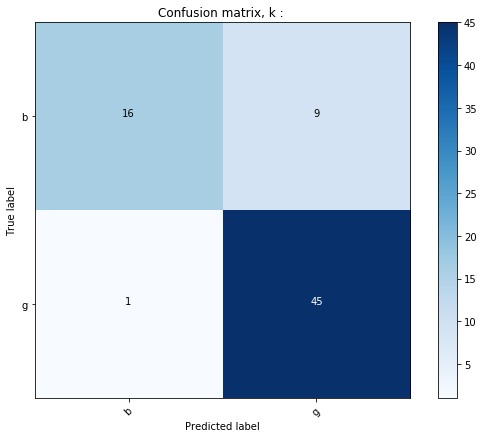

f1-micro average for k = 9  is  0.8591549295774648
f1-macro average for k = 9  is  0.8309523809523811


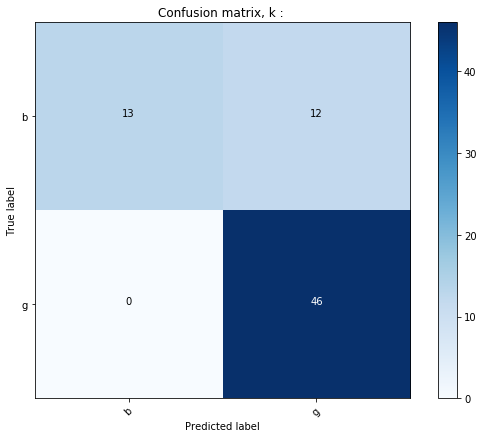

f1-micro average for k = 11  is  0.8309859154929577
f1-macro average for k = 11  is  0.784412955465587


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9, 11]

knn_f1_macro=[]
knn_f1_micro=[]
test_scores_knn = [] 
for k in k_values: 
  knn_default = KNeighborsClassifier(n_neighbors=k)
  knn_default.fit(x_train, y_train)
  y_pred =knn_default.predict(x_test)
  f1_micro = f1_score(y_test,y_pred, average = 'micro')
  f1_macro = f1_score(y_test,y_pred, average = 'macro')

  plot_confusion_matrix(confusion_matrix(y_test, y_pred),
                          ['b','g'],
                          title='Confusion matrix, k : ')
  print('f1-micro average for k =', k,' is ', f1_micro)
  print('f1-macro average for k =', k,' is ', f1_macro)
  test_scores_knn.append((f1_micro+f1_macro)/2)
  knn_f1_micro.append(f1_micro)
  knn_f1_macro.append(f1_macro)


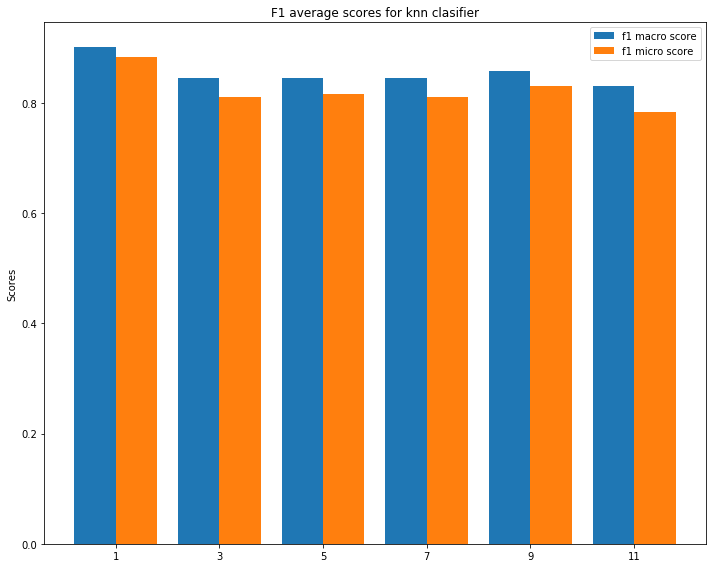

In [ ]:
# bar plots for dummy clasifier

bar_plot(k_values, knn_f1_micro, knn_f1_macro, "f1 macro score", "f1 micro score", "Scores", "F1 average scores for knn clasifier")

In [ ]:
best_strategy=k_values[np.argmax(test_scores_knn)]
print("The best strategy regarding the training set is: k=",best_strategy)
dclf_best=KNeighborsClassifier(n_neighbors=best_strategy)
dclf_best.fit(x_train,y_train)
y_pr=dclf_best.predict(x_test)

print("f1-macro score is: ",f1_score(y_test,y_pr,average = 'macro')," and f1-micro score is: ",f1_score(y_test,y_pr,average = 'micro'))

print(classification_report(y_test, y_pred))

The best strategy regarding the training set is: k= 1
f1-macro score is:  0.8832511158092553  and f1-micro score is:  0.9014084507042254
              precision    recall  f1-score   support

           0       1.00      0.52      0.68        25
           1       0.79      1.00      0.88        46

    accuracy                           0.83        71
   macro avg       0.90      0.76      0.78        71
weighted avg       0.87      0.83      0.81        71



Προκύπτει ως καλύτερο k για το συγκεκριμένο test set το k=1, με όσο το k αυξάνεται να μειώνεται η ακρίβεια. Όπως και στους dummy clasifiers, η τιμή f1_macro και f1_micro είναι διαφορετική.

## Μέρος 3 - Optimisation

Σε αυτό το μέρος θα βελτιστοποιήσουμε τον KNN classifier μεσώ gridsearch, έχοντας ως υπερπαραμέτρους τον αριθμό γειτόνων k και το PCA. Αυτή η διαδικασία θα γίνει μόνο στον NearestNeighbors, αφού οι dummy clasifiers επιλέγουν με βάση το πλήθος των κλάσεων στο dataset, το οποίο έχουμε εξισορροπήσει.

Για να αντιμετωπίσουμε την ανισσοροπία του dataset, μπορούμε να εφαρμόσουμε στο train set undersampling ή oversampling. Επειδή το dataset είναι ήδη μικρό, θα χαθεί σημαντική πληροφορία αν κάνουμε undersampling, οπότε επιλέγουμε να εφαρμόσουμε oversampling.

In [ ]:
from imblearn.over_sampling import RandomOverSampler
sampler = RandomOverSampler()
x_train_resampled, y_train_resampled = sampler.fit_sample(x_train, y_train)

b_count = np.count_nonzero(y_train_resampled)
g_count = len(y_train_resampled) - b_count
print("Occurences of class \'g\' in train set : ", "{0:.2f}".format(100*g_count/(len(y_train_resampled))), "%")
print("Occurences of class \'b\' in train set : ", "{0:.2f}".format(100*b_count/(len(y_train_resampled))), "%")


x_train = x_train_resampled
y_train = y_train_resampled


Occurences of class 'g' in train set :  50.00 %
Occurences of class 'b' in train set :  50.00 %


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from sklearn.decomposition import PCA
from random import randint
# we test knn for default parameter k = 5

knn_default=KNeighborsClassifier(n_neighbors=5)
knn_default.fit(x_train,y_train)

y_pred_def=knn_default.predict(x_test)
f1_macro_def=f1_score(y_test,y_pred,average = 'macro')
f1_micro_def=f1_score(y_test,y_pred,average = 'micro')
print("For initial k=5 and no PCA dimension reduction we have f1 macro: ",f1_macro_def,"and f1 micro: ",f1_micro_def)


For initial k=5 and no PCA dimension reduction we have f1 macro:  0.784412955465587 and f1 micro:  0.8309859154929577


Στη συνέχεια υλοποιούμε τη συνάρτηση cross validation που θα χρησιμοποιήσουμε. Δέχεται ως δεδομένα τον ταξινομητή, τους πίνακες x_train και y_train, το πλήθος των γειτόνων και τη μετρική την οποία θέλουμε να χρησιμοποιήσουμε για αξιολόγηση. Eπιστρέφει τον μέσο όρο των scores για τα n folds.

In [ ]:
def run_kfold(clf,x,y,n_values,metric):

  fold_size = len(x)//n_values

  outcomes = []
  fold = 0
  for index in range(n_values):
    start = index * fold_size;
    end = start + fold_size;

    # slicing arrays based on start and end indices
    X_test = x[start:end]
    Y_test = y[start:end]
    X_train = np.concatenate((x[:start], x[end:]), axis = 0)
    Y_train = np.concatenate((y[:start], y[end:]), axis = 0)
    
    clf.fit(X_train, Y_train)
    predictions = clf.predict(X_test)
    accuracy = f1_score(Y_test, predictions, average = metric)
    outcomes.append(accuracy)
    
  return np.mean(outcomes)

Με χρήση της παραπάνω συνάρτησης εκτελούμε gridsearch για τιμές k στο διάστημε [1,35] και για τιμές PCA στο διάστημα [1, 35], αφού το κάθε δείγμα έχει 35 features. Για κάθε συνδυασμό τιμών υπολογίζουμε τα f1_micro και f1_macro scores, τα οποία διατηρούμε στον πίνακα knn_scores.

In [ ]:
#optimize knn classifier
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
knn_scores = {}

for n in range(0, 35):

  if n > 0:
    pca=PCA(n_components=n)
    x_train_principal=pca.fit_transform(x_train)
  else:
    x_train_principal = x_train
  
  for k in range(1,51,2):
      knn = KNeighborsClassifier(n_neighbors=k)
      scores_macro = run_kfold(knn, x_train_principal, y_train, 10, 'macro')
      
      scores_micro = run_kfold(knn, x_train_principal, y_train, 10, 'micro')
      knn_scores[(n,k)]= (scores_macro + scores_micro) / 2
    
(n_best,k_best)=max(knn_scores, key=knn_scores.get)
print("The optimal value of PCA reduction is :", n_best)
print("The optimal value of neighbors is :", k_best)

The optimal value of PCA reduction is : 11
The optimal value of neighbors is : 1


Παρατηρούμε ότι η βέλτιστη απόδοση σύμφωνα με το cross validation προκύπτει για τιμή neighbors = 1 και PCA = 10. Στη συνέχεια, τρέχουμε τον knn classifier για αυτές τις υπερπαραμέτρους στο test set και εμφανίζουμε τα αποτελέσματα.

In [ ]:
#test knn on the test set
from sklearn.metrics import classification_report, confusion_matrix

pca_best=PCA(n_components=n_best)
knn_best=KNeighborsClassifier(n_neighbors=k_best)
x_train_principal=pca_best.fit_transform(x_train)

start = time()
knn_best.fit(x_train_principal,y_train)
end = time()
knn_time_fit = (end - start)

x_test_principal=pca_best.transform(x_test)

start = time()
y_pred=knn_best.predict(x_test_principal)
end = time()
knn_time_predict = end - start

knn_f1micro=f1_score(y_test,y_pred,average = 'micro')
knn_f1macro=f1_score(y_test,y_pred,average = 'macro')
print("f1 micro average for optimized knn is: ",knn_f1micro)
print("f1 macro average for optimized knn is: ",knn_f1macro)

print(classification_report(y_test, y_pred))

f1 micro average for optimized knn is:  0.9436619718309859
f1 macro average for optimized knn is:  0.9356884057971016
              precision    recall  f1-score   support

           0       1.00      0.84      0.91        25
           1       0.92      1.00      0.96        46

    accuracy                           0.94        71
   macro avg       0.96      0.92      0.94        71
weighted avg       0.95      0.94      0.94        71



Εμφανίζουμε σε bar plots τους χρόνους για την εκπαίδευση και πρόβλεψη όλων των ταξιμονητών.Όπως είναι αναμενόμενο παρατηρούμε οτι ο χρόνος πρόβλεψης του KNN είναι κατα πολύ μεγαλύτερος των αντίστοιχων χρόνων όλων των στρατηγικών του dummy classifier.

In [ ]:
fit_times = dummy_time_fit.copy()
fit_times = [i * 1000 for i in fit_times]
fit_times.append(knn_time_fit*1000)

predict_times = dummy_time_predict.copy()
predict_times = [i * 1000 for i in predict_times]
predict_times.append(knn_time_predict*1000)

strats = strategies.copy()
strats.append("Optimal knn")



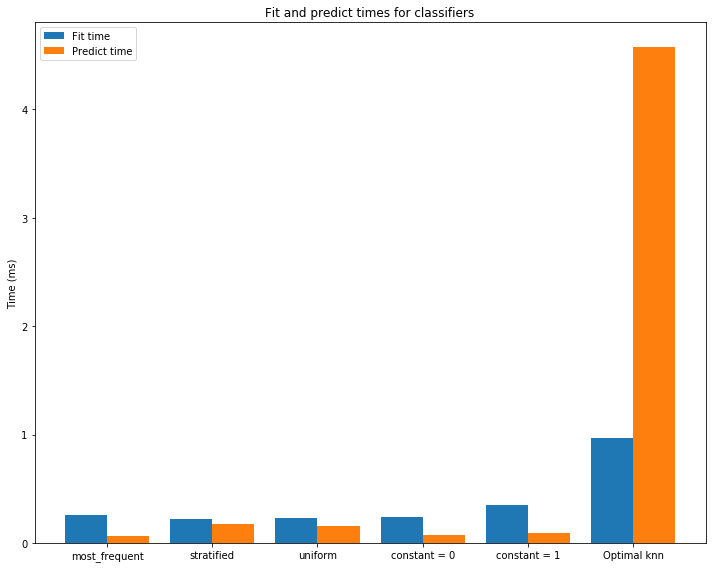

In [ ]:
bar_plot(strats, fit_times, predict_times, "Fit time", "Predict time", "Time (ms)", "Fit and predict times for classifiers")

Τέλος εμφανίζουμε και τα bar plots για τις μετρικές micro και macro όλων των ταξινομητων.

In [ ]:
#bar plots for all classifiers
#knn_couples=[(20,5),(n_best,k_best)]
#knn_sc
"""strategies.append("Initial KNN")
total_f1_micro=dummy_f1_micro
total_f1_macro=dummy_f1_macro

total_f1_micro.append(knn_f1micro)
total_f1_macro.append(knn_f1macro)

total_f1_micro.append(f1_micro_def)
total_f1_macro.append(f1_macro_def)"""
stra=strats.copy()
stra.append("Initial KNN")
micro=dummy_f1_micro.copy()
macro=dummy_f1_macro.copy()
micro.append(knn_f1micro)
macro.append(knn_f1macro)
micro.append(f1_micro_def)
macro.append(f1_macro_def)

7 7 7


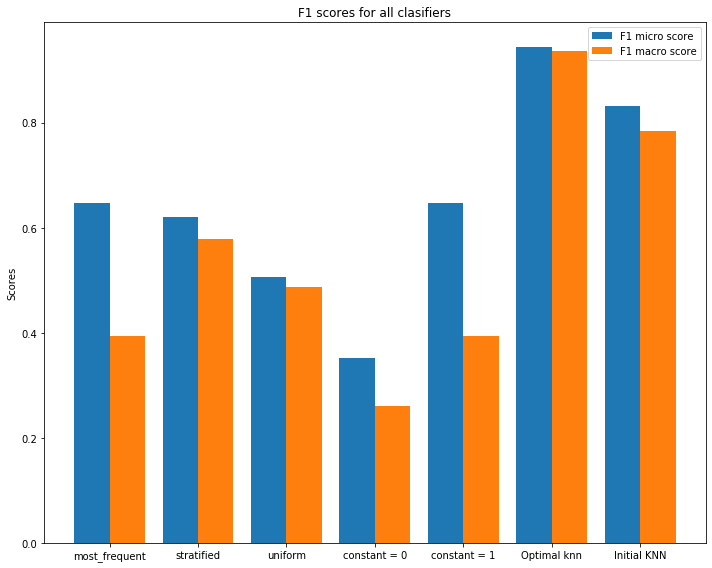

In [ ]:
bar_plot(stra, micro, macro, "F1 micro score", "F1 macro score", "Scores", "F1 scores for all clasifiers")

## Συμπεράσματα βελτιστοποίησης



*   Αναφορικά με τους χρόνους εκτέλεσης, παρατηρούμε πως οι dummy classifiers έχουν μικρά fit και predict time, αφού πρακτικά δεν εκτελούν κάποια πράξη. Αντίθετα ο knn classifier είναι αργός τόσο στο στάδιο fit και ιδιαίτερα στο στάδιο predict, το οποίο ήταν αναμμενόμενο, λόγω της σχετικής πολυπλοκότητας του.
*   Σχετικά με τις επιδόσεις, παρατηρούμε ότι ο default knn έχει καλύτερη επίδοση από όλους τους dummy clasifiers. Για τους dummy ταξινομητές όπως αναφέραμε δεν κάναμε κάποια βελιστοποίηση ενώ για τον knn ταξινομητή φαίνεται απο τις δύο τελευταίες στήλες του διαγράμματος η διαφορά του στην απόδοση όπως προέκυψε μετά την βελτιστοποίηση. Μετά το gridsearch προκύπτει τιμή k = 1 και PCA = 11 ζευγος με το οποίο συνεπάγεται αύξηση στην ακρίβεια του KNN της τάξης 10% σε σχέση με την default τιμή του ταξινομητή.
